In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump

In [8]:
def topspeed_intervals(speed):
    if speed < 186:
        return 1
    elif 186 <= speed < 208:
        return 2
    else:
        return 3

def maximumpower_intervals(speed):
    if speed < 114:
        return 1
    elif 114 <= speed < 151:
        return 2
    else:
        return 3

def acceleration_intervals(speed):
    if speed < 9.5:
        return 1
    elif 9.5 <= speed < 11.4:
        return 2
    else:
        return 3

In [9]:
cars_data = pd.read_csv('clean.csv')
cars_data['TopSpeed'] = cars_data['TopSpeed'].apply(topspeed_intervals)
cars_data['TopSpeed'].value_counts()

TopSpeed
1    8529
3    8440
2    8313
Name: count, dtype: int64

In [10]:
cars_data['MaximumPower'] = cars_data['MaximumPower'].apply(maximumpower_intervals)
cars_data['MaximumPower'].value_counts()

MaximumPower
2    8630
1    8500
3    8152
Name: count, dtype: int64

In [11]:
cars_data['Acceleration'] = cars_data['Acceleration'].apply(acceleration_intervals)
cars_data['Acceleration'].value_counts()

Acceleration
1    8581
2    8379
3    8322
Name: count, dtype: int64

In [12]:
cars_data.nunique()

CarName             23298
EngineType             17
FuelType                8
MaximumPower            3
MaximumTorque         313
Drivetrain              3
FuelConsumption        97
Range                 923
FuelTankCapacity       79
CO2Emissions          219
TopSpeed                3
Acceleration            3
dtype: int64

In [13]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25282 entries, 0 to 25281
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           25282 non-null  object 
 1   EngineType        25282 non-null  object 
 2   FuelType          25282 non-null  object 
 3   MaximumPower      25282 non-null  int64  
 4   MaximumTorque     25282 non-null  int64  
 5   Drivetrain        25282 non-null  object 
 6   FuelConsumption   25282 non-null  float64
 7   Range             25282 non-null  int64  
 8   FuelTankCapacity  25282 non-null  float64
 9   CO2Emissions      25282 non-null  int64  
 10  TopSpeed          25282 non-null  int64  
 11  Acceleration      25282 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 2.3+ MB


In [14]:
label_encoder_dict = {}

for col in ['CarName', 'EngineType', 'FuelType', 'Drivetrain']:
    label_encoder = LabelEncoder()
    cars_data[col] = label_encoder.fit_transform(cars_data[col])
    label_encoder_dict[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Словарь замен категориальных значений
print(label_encoder_dict)

{'CarName': {'Abarth 500 1.4 16v T-JET 135HP': 0, 'Abarth 500 1.4 16v T-JET 140HP Sequential': 1, 'Abarth 500 595 1.4 16v T-JET 160HP': 2, 'Abarth 500 595 1.4 16v T-JET 160HP Sequential': 3, 'Abarth 500 595 Competizione 1.4 16v T-JET 160HP': 4, 'Abarth 500 595 Competizione 1.4 16v T-JET 160HP Sequential': 5, 'Abarth 500 595 Competizione 1.4 16v T-JET 180HP': 6, 'Abarth 500 595 Competizione 1.4 16v T-JET 180HP Sequential': 7, 'Abarth 500 595 Turismo 1.4 16v T-JET 160HP': 8, 'Abarth 500 595 Turismo 1.4 16v T-JET 160HP Sequential': 9, 'Abarth 500 595C 1.4 16v T-JET 160HP': 10, 'Abarth 500 595C 1.4 16v T-JET 160HP Sequential': 11, 'Abarth 500 595C Competizione 1.4 16v T-JET 160HP': 12, 'Abarth 500 595C Competizione 1.4 16v T-JET 160HP Sequential': 13, 'Abarth 500 695 Tributo Ferrari': 14, 'Abarth 500 C 1.4 16v T-JET 135HP': 15, 'Abarth 500 C 1.4 16v T-JET 140HP Sequential': 16, 'Abarth 500C 1.4 16v T-JET 135HP': 17, 'Abarth 500C 1.4 16v T-JET 140HP Sequential': 18, 'Abarth 500C 1.4 16v T-J

In [15]:
cars_data_not_balanced = cars_data
cars_data

,CarName,EngineType,FuelType,MaximumPower,MaximumTorque,Drivetrain,FuelConsumption,Range,FuelTankCapacity,CO2Emissions,TopSpeed,Acceleration
0,13247,4,0,1,215,1,4.5,1111,50.0,120,1,3
1,17426,3,4,1,112,1,6.0,750,45.0,144,1,3
2,10239,9,4,3,300,2,9.7,721,70.0,231,3,1
3,21038,4,4,2,155,1,7.2,763,55.0,173,2,3
4,9803,4,4,3,240,2,8.3,746,62.0,198,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25277,11706,4,0,2,280,1,7.1,732,52.0,189,2,2
25278,19155,4,4,3,262,1,9.4,553,52.0,226,3,1
25279,11700,4,0,1,260,1,4.5,1155,52.0,119,2,3
25280,20137,4,4,3,250,2,8.5,423,36.0,202,3,1


1. Model training and parameter selection using Grid Search

Balanced dataset

In [16]:
x = cars_data.drop("TopSpeed", axis=1)
y = cars_data['TopSpeed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2 ,random_state=42)

a. K-nearest neighbors (KNN)

In [17]:
knn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid={'n_neighbors': [3,5], 'algorithm': ['ball_tree', 'kd_tree', 'brute']})

#knn = KNeighborsClassifier(n_neighbors=100, algorithm="")
knn.fit(x_train, y_train)

# Вывод наилучших гиперпараметров и прогноза
print("Наилучшие гиперпараметры: ", knn.best_params_)

# Оценка точности модели на тестовом наборе
accuracy = knn.score(x_test, y_test)
print("Точность на тестовом наборе: ", accuracy)

Наилучшие гиперпараметры:  {'algorithm': 'ball_tree', 'n_neighbors': 3}
Точность на тестовом наборе:  0.8518884714257465


In [18]:
print(knn.score(x_test.values, y_test.values))
knn.best_params_

0.8518884714257465


C:\Users\МашОбуч\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


{'algorithm': 'ball_tree', 'n_neighbors': 3}

C:\Users\МашОбуч\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

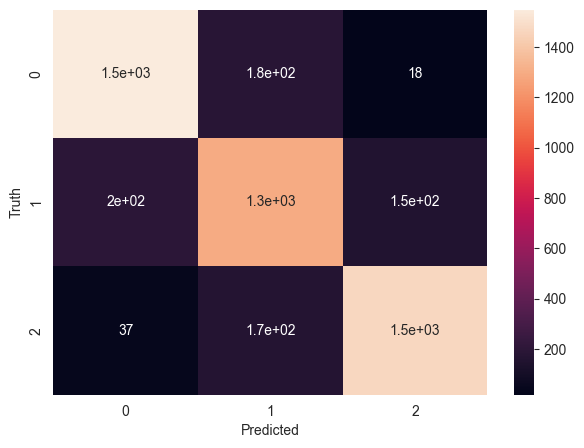

In [19]:
y_pred = knn.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [20]:
from sklearn.metrics import roc_auc_score

# Вычисление предсказанных вероятностей принадлежности классу
y_pred_proba = knn.predict_proba(x_test)

# Вычисление показателя ROC/AUC
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Вывод отчета классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Вывод показателя ROC/AUC
print("ROC/AUC:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.89      0.88      1747
           2       0.79      0.79      0.79      1642
           3       0.90      0.88      0.89      1668

    accuracy                           0.85      5057
   macro avg       0.85      0.85      0.85      5057
weighted avg       0.85      0.85      0.85      5057

ROC/AUC: 0.9499344189442311


In [21]:
dump(knn, "knn_model.joblib")

['knn_model.joblib']

b. Support Vector Classification (SVM)

c. Decision tree

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [100],
              'gamma': [0.0001],
              'kernel': ['rbf']}

model = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)

model.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.884 total time=  45.7s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.883 total time=  45.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.883 total time=  45.3s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.885 total time=  45.1s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.894 total time=  45.9s


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [100], 'gamma': [0.0001], 'kernel': ['rbf']},
             verbose=3)

In [31]:
# print best parameter after tuning
print(model.best_params_)

# print how our model looks after hyper-parameter tuning
print(model.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001, probability=True)


In [32]:
print(model.score(x_test.values, y_test.values))

C:\Users\МашОбуч\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.901324896183508


C:\Users\МашОбуч\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Real')

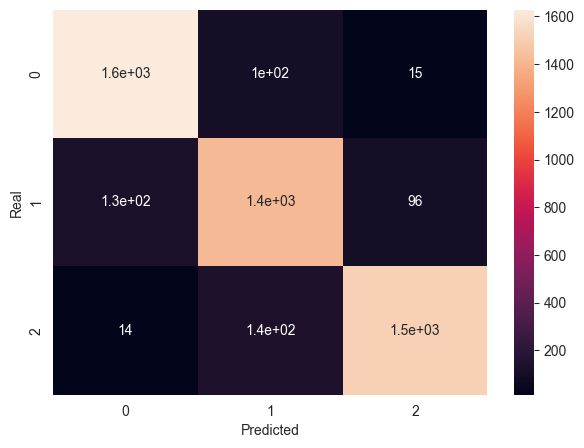

In [33]:
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Real")

In [34]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict(x_test)

y_decision = model.predict_proba(x_test)

roc_auc = roc_auc_score(y_test, y_decision, multi_class='ovr')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC/AUC:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.93      0.93      1747
           2       0.85      0.86      0.86      1642
           3       0.93      0.91      0.92      1668

    accuracy                           0.90      5057
   macro avg       0.90      0.90      0.90      5057
weighted avg       0.90      0.90      0.90      5057

ROC/AUC: 0.9637460799674346


In [36]:
x = cars_data.drop("TopSpeed", axis=1)
y = cars_data['TopSpeed']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [37]:
treeCl = DecisionTreeClassifier()
model = GridSearchCV(estimator=treeCl,  param_grid={'max_depth' : [2, 3, 10, 'None'], 'criterion': ['gini', 'entropy']})
model.fit(x_train, y_train)

C:\Users\МашОбуч\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\МашОбуч\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\МашОбуч\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\МашОбуч\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\МашОбуч\lib\site-packages\sklearn\utils\_param_validation.py", lin

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 10, 'None']})

In [38]:
print(model.score(x_test, y_test))
model.best_params_

0.8707482993197279


{'criterion': 'entropy', 'max_depth': 10}

C:\Users\МашОбуч\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

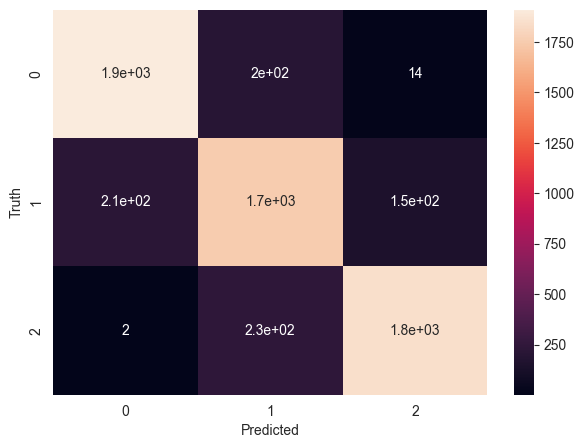

In [39]:
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [40]:
from sklearn.metrics import roc_auc_score

# Вывод отчета классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90      2126
           2       0.80      0.83      0.81      2113
           3       0.92      0.89      0.90      2082

    accuracy                           0.87      6321
   macro avg       0.87      0.87      0.87      6321
weighted avg       0.87      0.87      0.87      6321



       CarName  EngineType  FuelType  MaximumPower  MaximumTorque  Drivetrain  \
13970    18410           4         4             2            210           1   
8422      2109           6         0             3            400           2   
24985    14320           4         0             1            137           1   
5903      7086           4         4             2            161           1   
21065    11710           4         4             2            155           1   
...        ...         ...       ...           ...            ...         ...   
13123    19951           4         4             1            145           1   
19648    17851           3         4             1             95           1   
9845     16598           4         0             2            340           1   
10799    14701           4         0             1            160           1   
2732      3813           4         4             2            160           1   

       FuelConsumption  Ran

[Text(0.41606809701492536, 0.9545454545454546, 'Acceleration <= 1.5\nentropy = 1.585\nsamples = 18961\nvalue = [6403, 6200, 6358]'),
 Text(0.15614116915422885, 0.8636363636363636, 'MaximumPower <= 2.5\nentropy = 0.7\nsamples = 6442\nvalue = [66, 993, 5383]'),
 Text(0.07067786069651741, 0.7727272727272727, 'MaximumTorque <= 209.0\nentropy = 1.092\nsamples = 1543\nvalue = [25, 663, 855]'),
 Text(0.026492537313432835, 0.6818181818181818, 'MaximumPower <= 1.5\nentropy = 1.118\nsamples = 515\nvalue = [24, 341, 150]'),
 Text(0.007960199004975124, 0.5909090909090909, 'MaximumTorque <= 149.5\nentropy = 0.995\nsamples = 37\nvalue = [17, 20, 0]'),
 Text(0.003980099502487562, 0.5, 'FuelTankCapacity <= 44.5\nentropy = 0.523\nsamples = 17\nvalue = [15, 2, 0]'),
 Text(0.001990049751243781, 0.4090909090909091, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0, 0]'),
 Text(0.005970149253731343, 0.4090909090909091, 'Range <= 630.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.00398009950248756

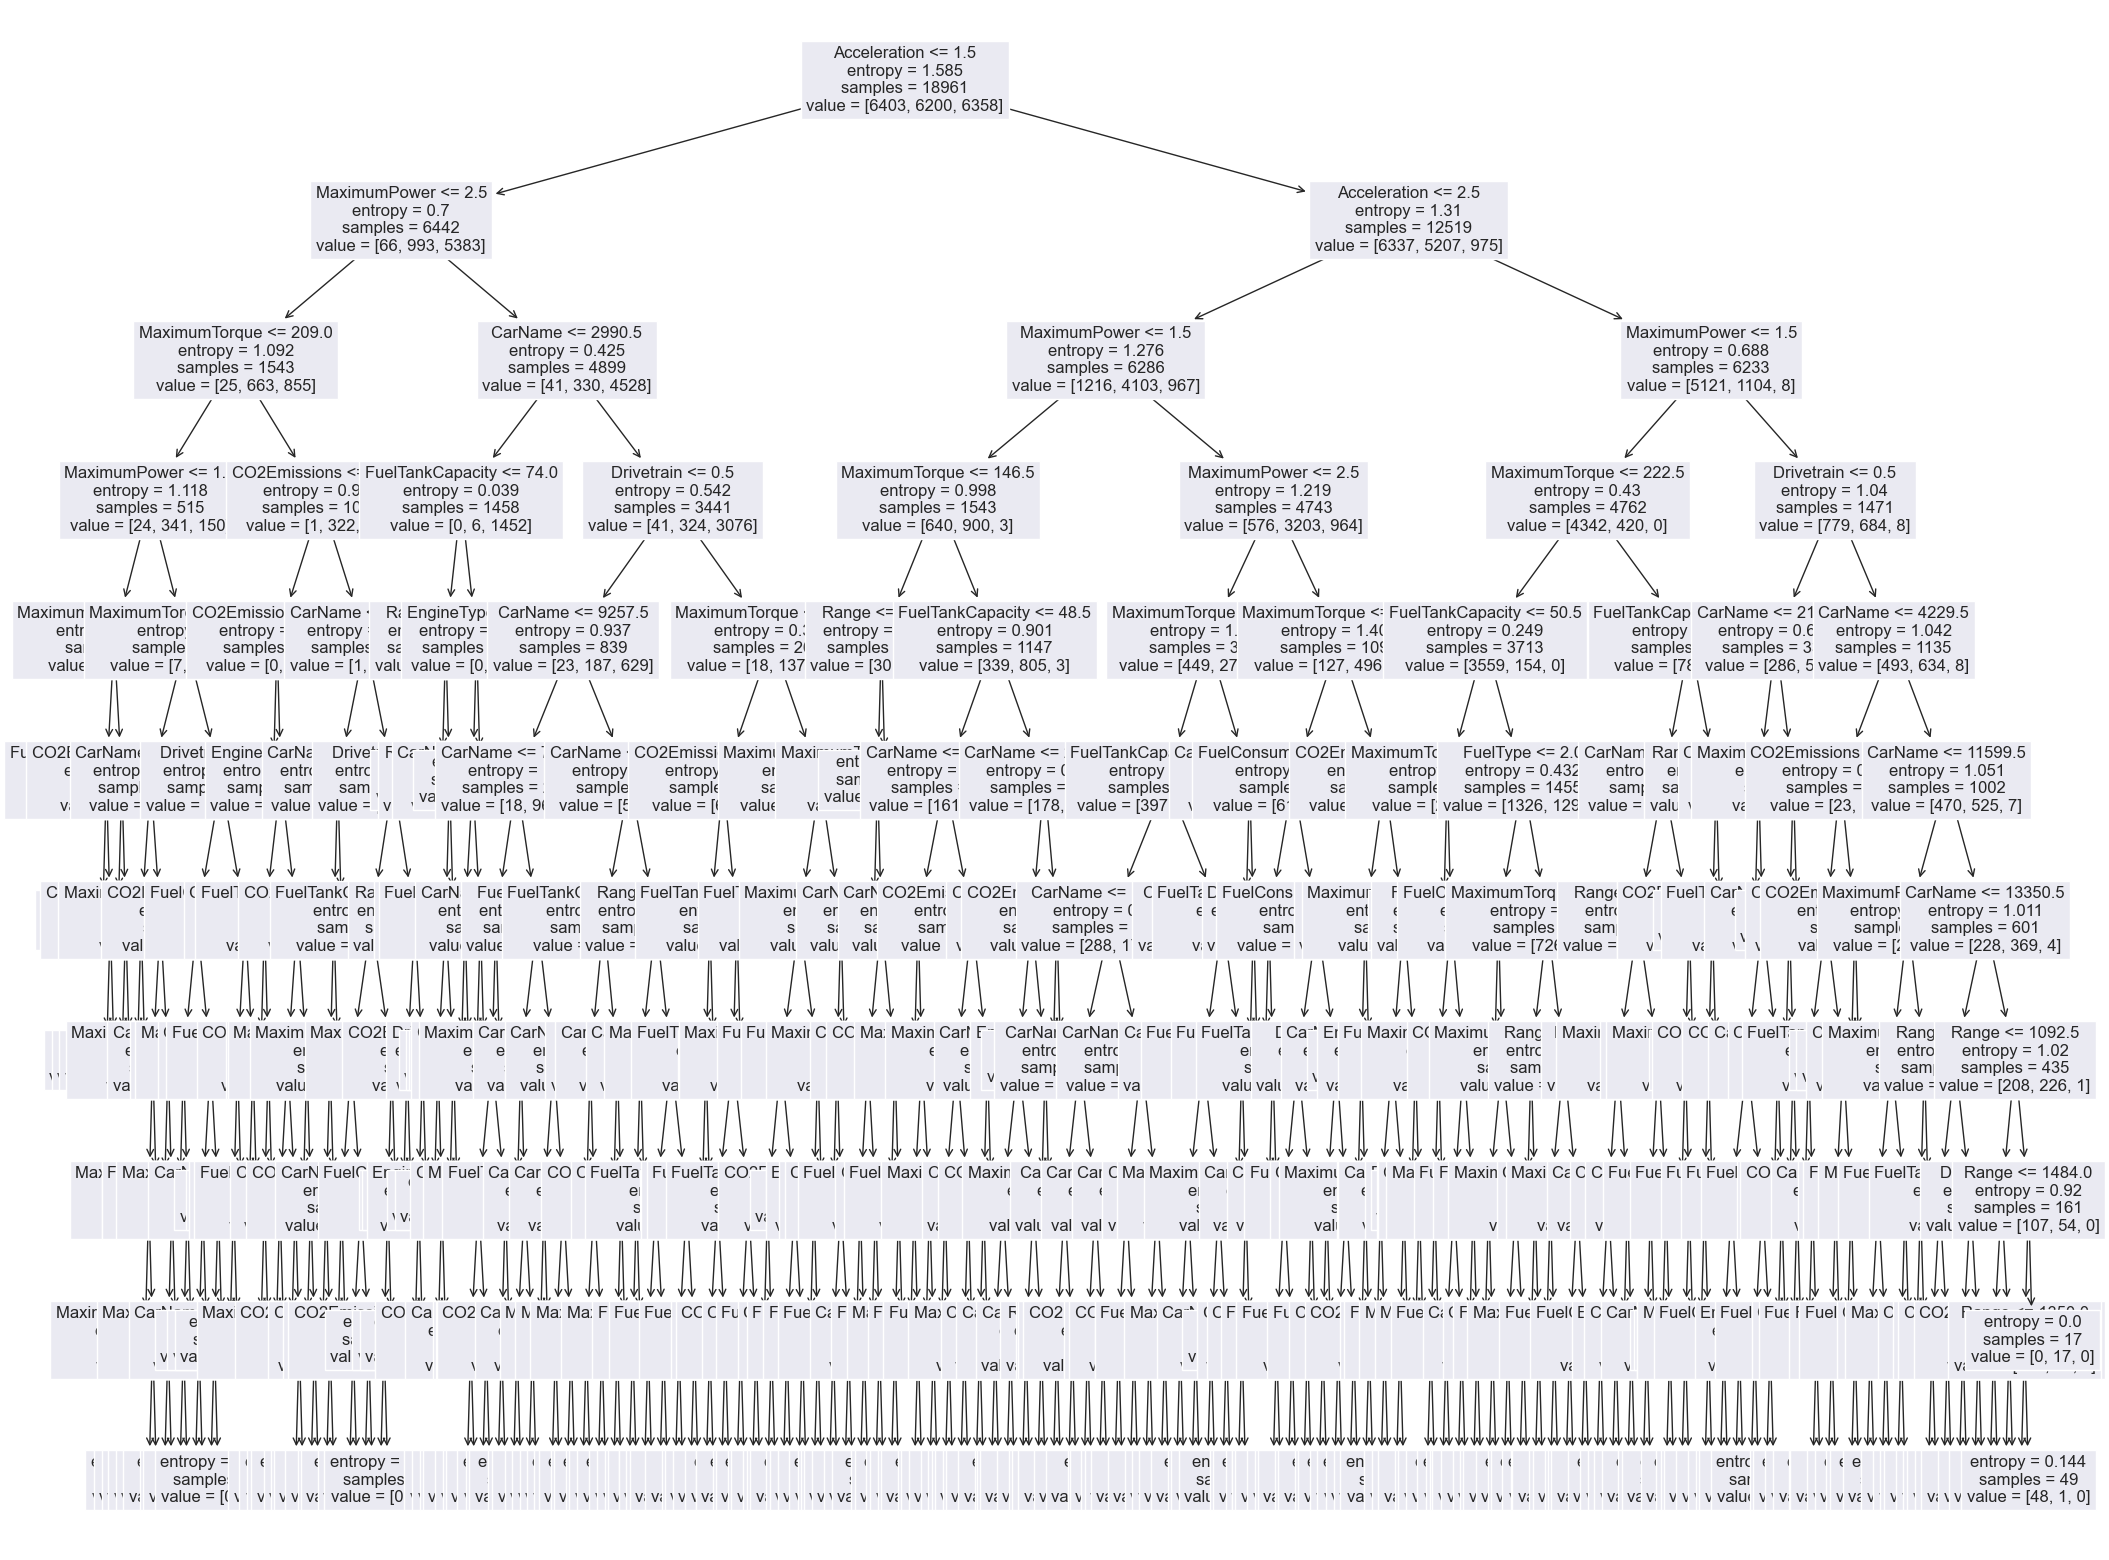

In [41]:
plt.figure(figsize=(25,20))
print(x_train)
plot_tree(model.best_estimator_, fontsize=12, feature_names=list(x_test.columns))

In [42]:
dump(model, "tree_model.joblib")

['tree_model.joblib']

In [43]:
print(model.score(x_test, y_test))
model.best_params_

0.8707482993197279


{'criterion': 'entropy', 'max_depth': 10}

In [44]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(x_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC/AUC:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90      2126
           2       0.80      0.83      0.81      2113
           3       0.92      0.89      0.90      2082

    accuracy                           0.87      6321
   macro avg       0.87      0.87      0.87      6321
weighted avg       0.87      0.87      0.87      6321

ROC/AUC: 0.9620920697980381
